In [1]:
import numpy as np
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [2]:
np.linalg.cond(np.dot(arr.T,arr))

np.float64(29104.197363314786)

In [3]:
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

In [4]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: >

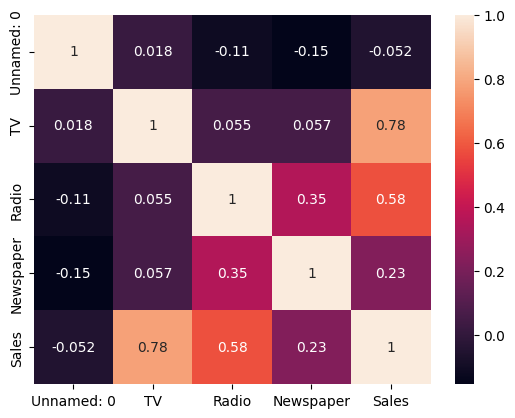

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
# VIF

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:,1:4], i))

In [9]:
pd.DataFrame({'vif': vif}, index=df.columns[1:4]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


In [11]:
# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_reduced = sm.add_constant(data[['X1', 'X3']])

# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(data['y'], data_with_constant_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Thu, 07 Aug 2025   Prob (F-statistic):              0.344
Time:                        01:46:16   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

# Calculate correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

# Combine the correlated variables X1 and X2 by taking their average
data['X1_X2_combined'] = (data['X1'] + data['X2']) / 2

# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_combined = sm.add_constant(data[['X1_X2_combined', 'X3']])

# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

# Create and fit an OLS model using the combined variable and X3
model_combined = sm.OLS(data['y'], data_with_constant_combined).fit()

# Print the summary for the model with combined predictors (X1_X2_combined and X3)
print("\nRegression summary for the model with combined predictors (X1_X2_combined and X3):")
print(model_combined.summary())


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3']], data['y'], test_size=0.2, random_state=42)

# Create a PLS model with 2 components
pls_model = PLSRegression(n_components=2)

# Fit the PLS model using the training data
pls_model.fit(X_train, y_train)

# Predict the output using the test data
y_pred = pls_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of PLS model:", mse)


Mean squared error of PLS model: 7359.987203343638
